In [1]:
# import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# thiết lập kiểu hiển thị của seaborn ch trực quan đẹp hơn
sns.set(style='whitegrid')
# tải dữ liệu từ file excel
df = pd.read_csv("Online Retail.csv", encoding="ISO-8859-1")
# xem vài dòng đầu tiên của dữ liệu
df.head()

,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [2]:
# xác định các cột bị thiếu thông tin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
# loại bỏ các giá trị bất thường
df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [4]:
# tạo cột total price để lưu tổng giá trị mỗi giao dịch
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [5]:
# chuyển cột invoice date thành kiểu ngày tháng để phân tich theo thời gian
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [14]:
#phân tích doanh thu theo thời gian
# trich xuất thời gian từ InvoiceDAte
df['Month'] = df['InvoiceDate'].dt.month
#tính tổng doanh thu theo tháng
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()
monthly_revenue

Month
1      691364.560
2      523631.890
3      717639.360
4      537808.621
5      770536.020
6      761739.900
7      719221.191
8      759138.380
9     1058590.172
10    1154979.300
11    1509496.330
12    1462538.820
Name: TotalPrice, dtype: float64

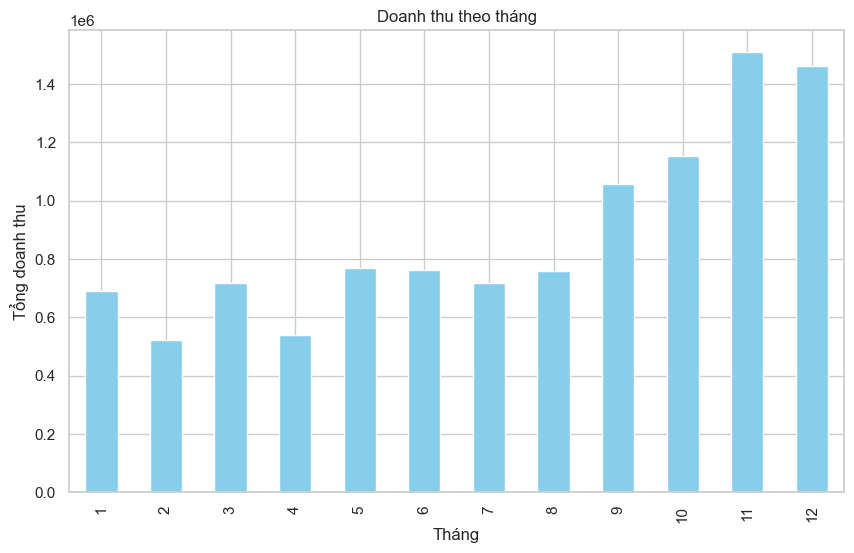

In [15]:
# biểu đồ doanh thu theo tháng
plt.figure(figsize=(10,6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title("Doanh thu theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Tổng doanh thu")
plt.show()

In [8]:
# phân tích các sản phẩm bán chạy
# xác định các sản phẩm bán chạy
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

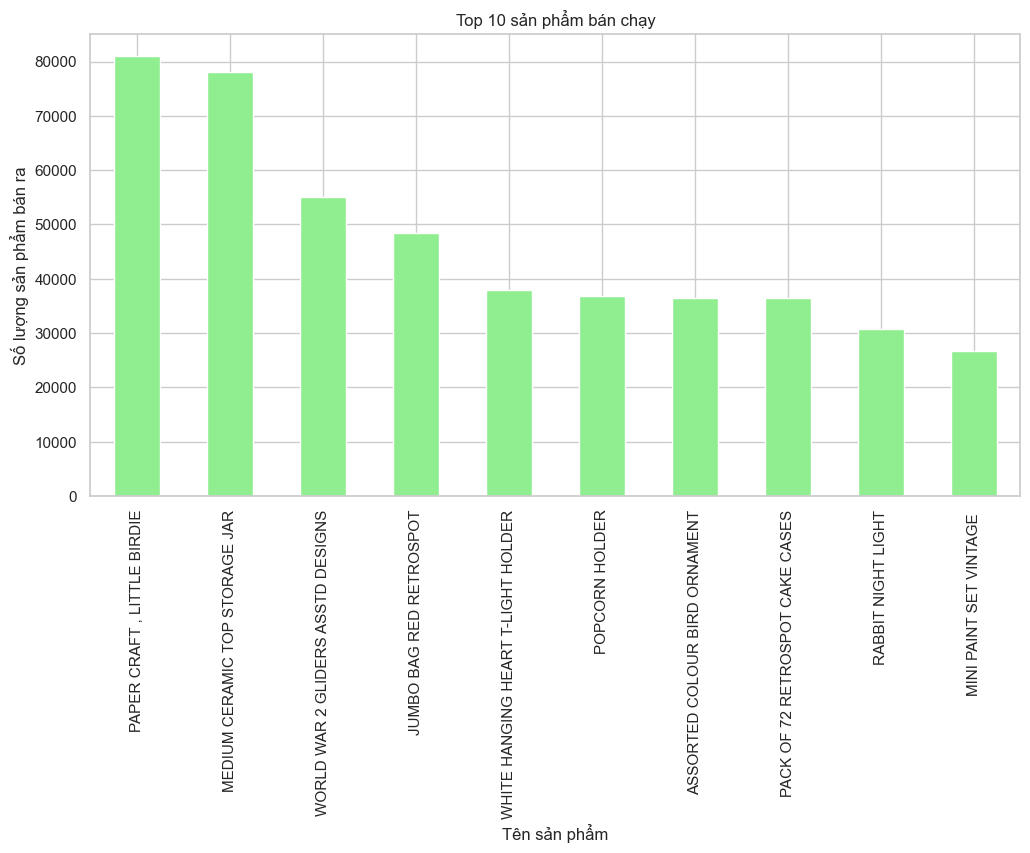

In [9]:
# biểu đồ top 10 sản phẩm bán chạy
plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='lightgreen')
plt.title("Top 10 sản phẩm bán chạy")
plt.xlabel("Tên sản phẩm")
plt.ylabel("Số lượng sản phẩm bán ra")
plt.show()

In [11]:
#phân tích doanh thu theo quốc gia
#tính doanh thu theo quốc gia
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
country_revenue.head(10)

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Australia          138521.310
Spain               61577.110
Switzerland         57089.900
Belgium             41196.340
Sweden              38378.330
Name: TotalPrice, dtype: float64

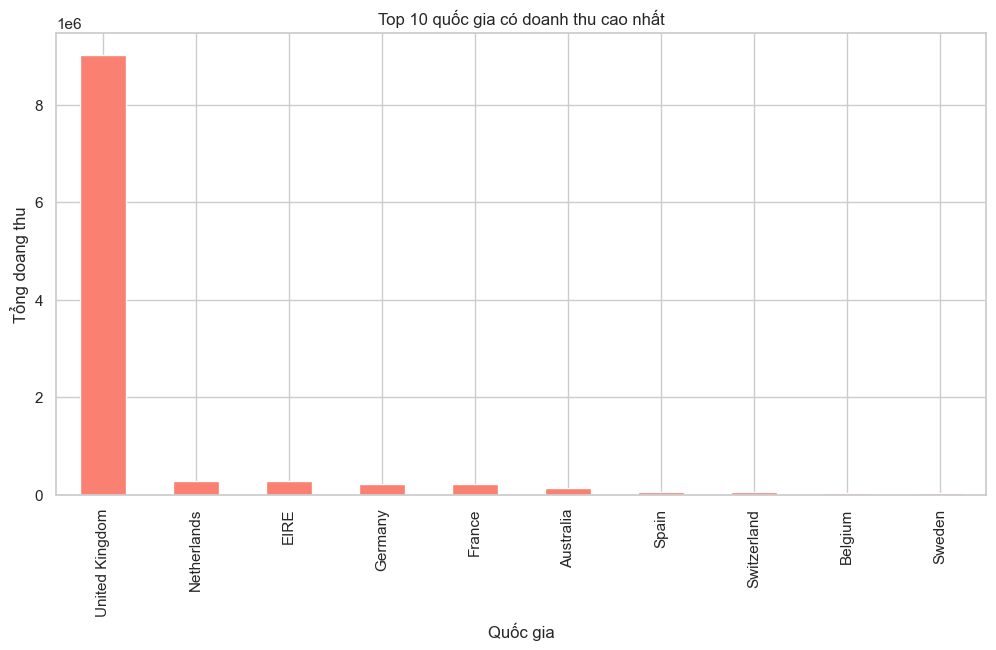

In [12]:
# biểu đồ các quốc gia có doanh thu cao
top_country = country_revenue.head(10)
plt.figure(figsize=(12, 6))
top_country.plot(kind='bar', color='salmon')
plt.title("Top 10 quốc gia có doanh thu cao nhất")
plt.xlabel("Quốc gia")
plt.ylabel("Tổng doang thu")
plt.show()

In [17]:
# lưu các kết quả ra file excel
monthly_revenue.to_csv('monthly_revenue.csv', index= False)
top_products.to_csv('top_products.csv', index= False)
country_revenue.to_csv('country_revenue.csv', index= False)
print("Dữ liệu đã được lưu thành công!")

Dữ liệu đã được lưu thành công!
